In [1]:
import os
import random
from xml.etree import ElementTree
import cv2 # Open CV
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Instance variables
image_file_ext = r".tif"
masks_file_ext = r".TIF"
train_dir_p    = "datasets-binary/train"
train_images_dir   = train_dir_p + "/images"
train_mask_dir     = train_dir_p + "/masks"

In [7]:
train_img_list = [os.path.join(train_images_dir, _) for _ in os.listdir(train_images_dir) if _.endswith(image_file_ext)]
train_mask_list = [os.path.join(train_mask_dir, _) for _ in os.listdir(train_mask_dir) if _.endswith(masks_file_ext)]

# Create image-mask pair list
img_mask_pair_list = []
for image_fp, mask_fp in zip( train_img_list, train_mask_list):
    img_mask_pair_list.append( (image_fp, mask_fp) )

'\nfor i in img_mask_pair_list:\n    print(i)\n'

In [24]:
def plot_all(images_cv, name=[]):
    fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=False, figsize=(20,20) )
    i = 0
    
    for y in range(3):
        axes[y].set_title( name[y] )
        axes[y].imshow(images_cv[i] )
        axes[y].get_xaxis().set_visible(False)
        axes[y].get_yaxis().set_visible(False)
        i+=1
        
    plt.show()

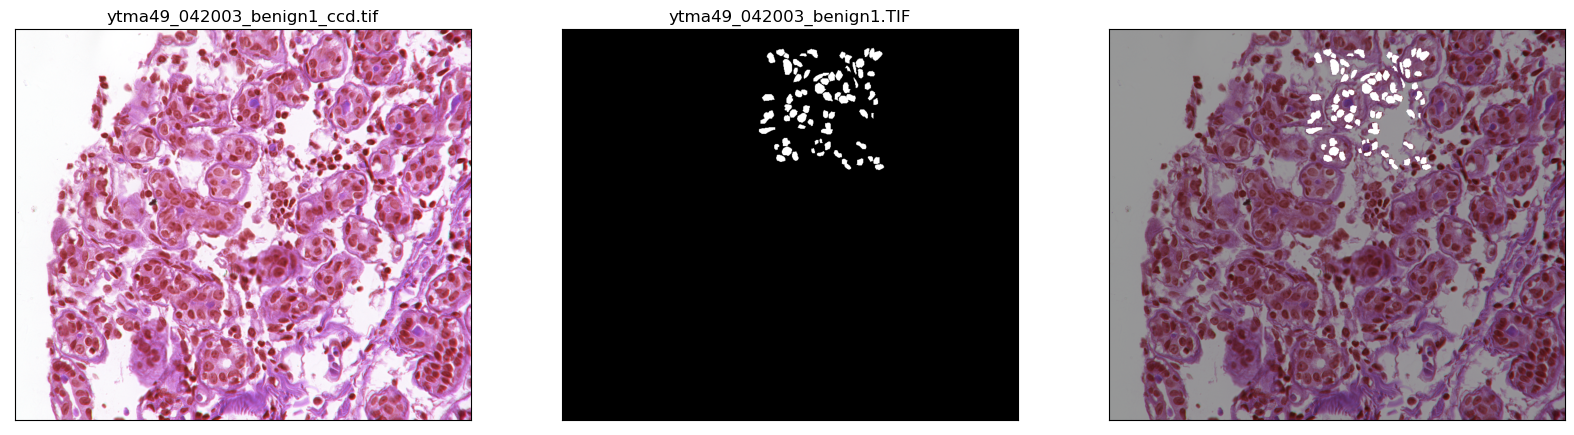

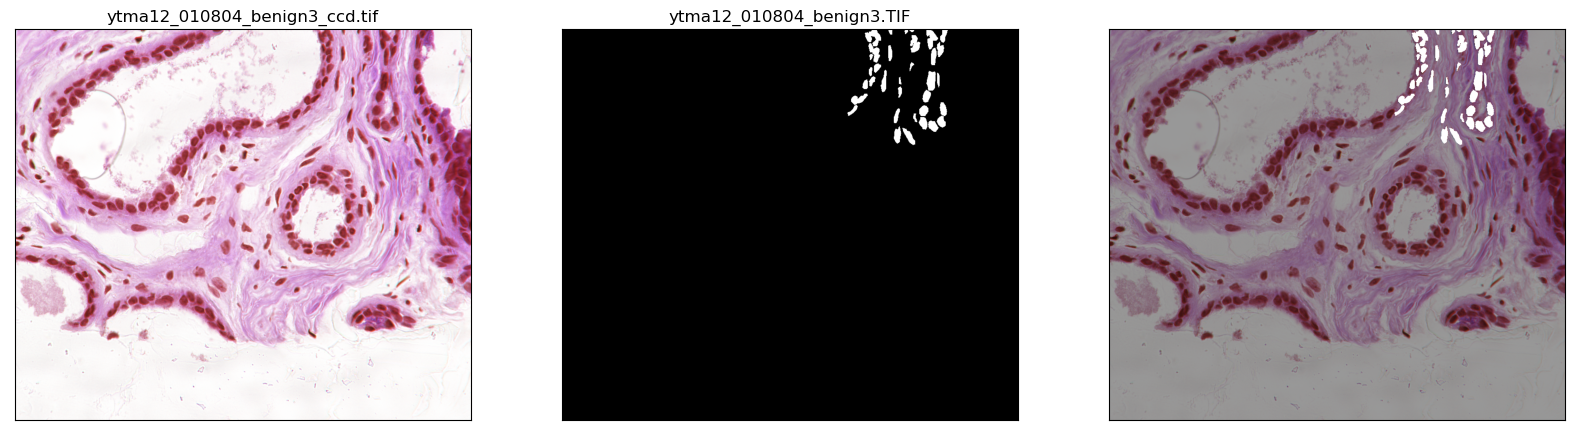

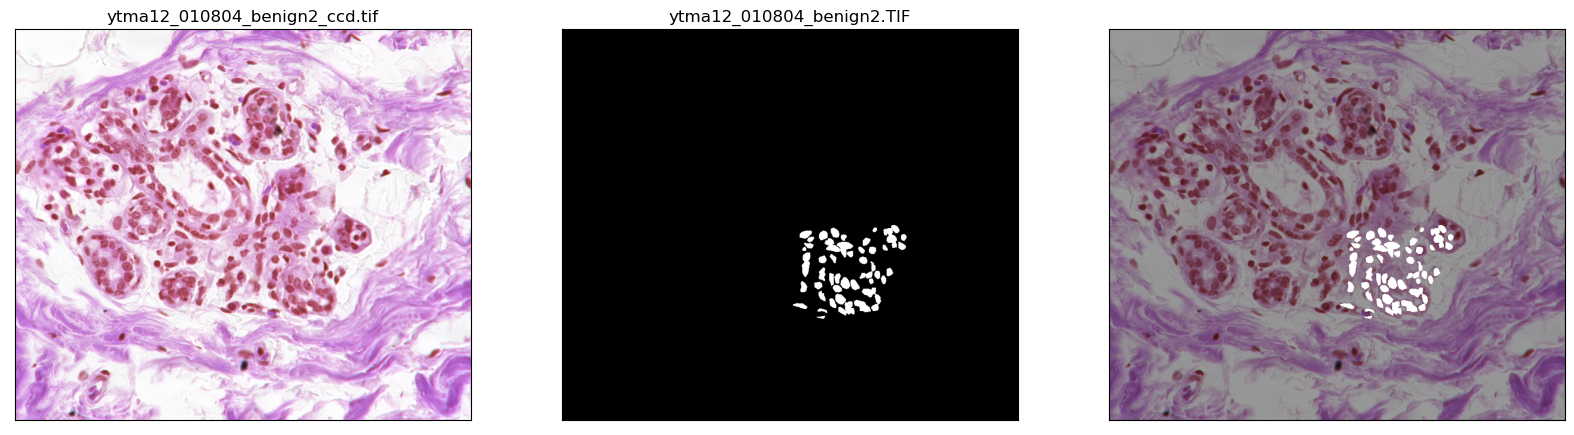

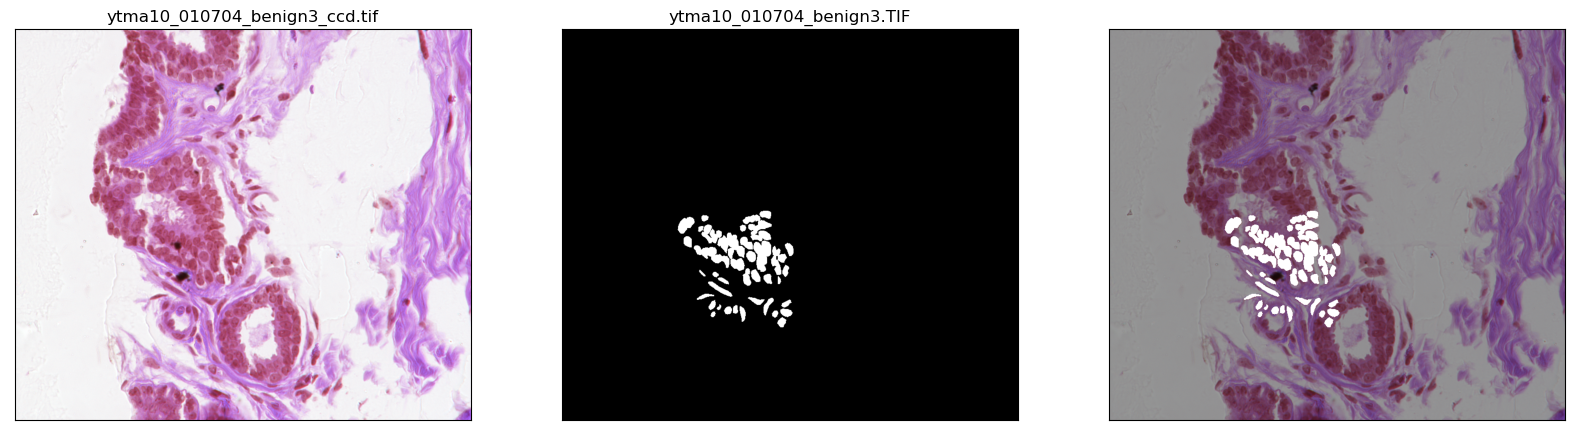

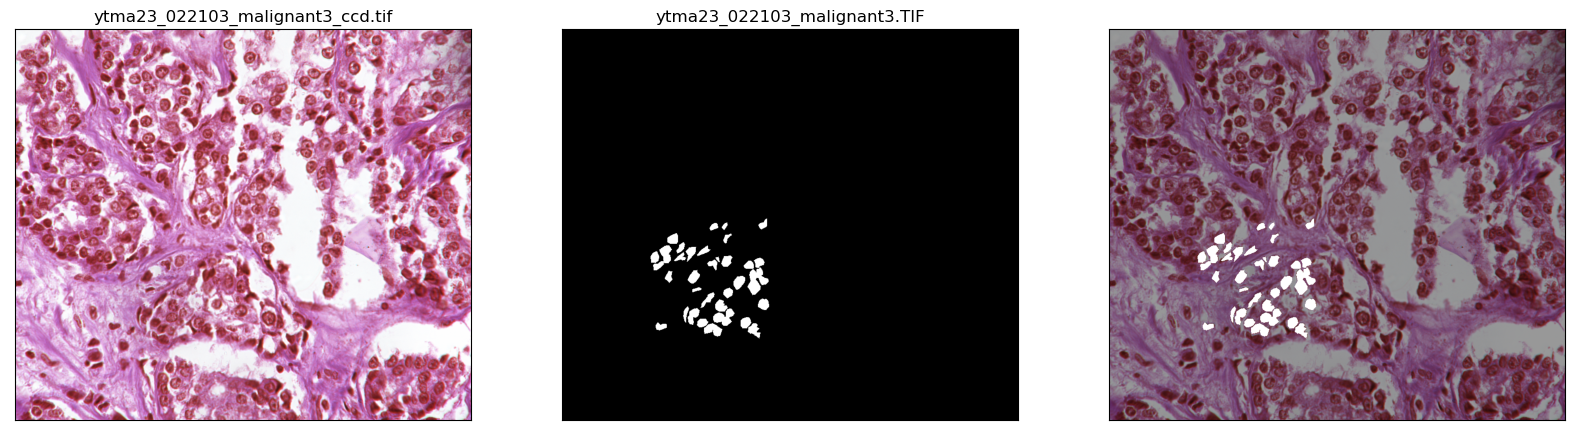

In [32]:
# Randomise pair list
random.shuffle(img_mask_pair_list)

for i in range(0,5):
    
    # Read images
    image = cv2.imread(img_mask_pair_list[i][0], 1)
    
    # Read binary mask
    mask = cv2.imread(img_mask_pair_list[i][1], 1)
        
    # Blend image
    img_blended = cv2.addWeighted(image, 0.6, mask, 0.95, 0)
     
    # Display
    image_fn = os.path.split(img_mask_pair_list[i][0])[1]
    mask_fn = os.path.split(img_mask_pair_list[i][1])[1]
    plot_all( [image, mask, img_blended ], [image_fn, mask_fn, ""] )
    plt.show()